<a href="https://colab.research.google.com/github/Jin-jin-jara/Deep-Learning/blob/master/intel_image_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Intel Image Classification**

Build the basic model in Tensorflow Keras using Convolutional Neural Network (CNN)to predict upto 6 class labels.



Libraries

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow.keras import initializers
import tensorflow as tf

# 모델 시각화
from keras.utils.vis_utils import model_to_dot # keras model을 dot language로 변환
from IPython.display import SVG #jupyter notebook에서 보려고
from keras.utils.vis_utils import plot_model

import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec # 다중 플롯 제어하기 위함

Using TensorFlow backend.


폴더에서 이미지를 추출하는 함수가 keras에 없다. 그래서 우리가 직접 함수를 만드는 것이 좋다.

In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

# 결과로 나온 숫자를 입력하면 클래스 이름을 알려주는 함수
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

Kaggle 파일 불러오기

In [4]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"layharon","key":"8e7daf374a60af14e4366dd157cd7e1a"}'}

In [5]:
# 파일이 제대로 업로드 됐는지 확인하기
!ls -1ha kaggle.json # kaggle.json이 나온다면 성공

kaggle.json


 json 파일 이동시키기- Kaggle API 를 사용하려면 json 파일을 ~/.kaggle로 이동 시켜야 하기 때문에, 밑의 코드를 실행시킨다.

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2318           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      15432            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       5105           False  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        335           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research          Knowledge         62           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       5542            True  


In [7]:
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 337M/346M [00:12<00:00, 18.5MB/s]
100% 346M/346M [00:12<00:00, 30.0MB/s]


In [8]:
!ls

intel-image-classification.zip	kaggle.json  sample_data


In [9]:
!unzip intel-image-classification.zip

Archive:  intel-image-classification.zip
  inflating: seg_pred/seg_pred/10004.jpg  
  inflating: seg_pred/seg_pred/10005.jpg  
  inflating: seg_pred/seg_pred/10012.jpg  
  inflating: seg_pred/seg_pred/10013.jpg  
  inflating: seg_pred/seg_pred/10017.jpg  
  inflating: seg_pred/seg_pred/10021.jpg  
  inflating: seg_pred/seg_pred/1003.jpg  
  inflating: seg_pred/seg_pred/10034.jpg  
  inflating: seg_pred/seg_pred/10038.jpg  
  inflating: seg_pred/seg_pred/10040.jpg  
  inflating: seg_pred/seg_pred/10043.jpg  
  inflating: seg_pred/seg_pred/10045.jpg  
  inflating: seg_pred/seg_pred/10047.jpg  
  inflating: seg_pred/seg_pred/10048.jpg  
  inflating: seg_pred/seg_pred/10052.jpg  
  inflating: seg_pred/seg_pred/10054.jpg  
  inflating: seg_pred/seg_pred/10059.jpg  
  inflating: seg_pred/seg_pred/10060.jpg  
  inflating: seg_pred/seg_pred/10066.jpg  
  inflating: seg_pred/seg_pred/10069.jpg  
  inflating: seg_pred/seg_pred/10073.jpg  
  inflating: seg_pred/seg_pred/10079.jpg  
  inflating: s

In [0]:
Images, Labels = get_images('../content/seg_train/seg_train/') # train이미지를 폴더에서 가져오기

Images = np.array(Images) # 이미지의 리스트를 numpy array로 바꾼다
Labels = np.array(Labels)

Lets find shape of our traing data.

train 데이터의 shape은 (Number of Training Images, Width of image, Height of image, Channel of image)

In [11]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


이미지 보기

In [12]:
Images[0]

array([[[126, 199, 243],
        [126, 199, 243],
        [126, 199, 243],
        ...,
        [121, 206, 252],
        [123, 205, 252],
        [122, 204, 251]],

       [[125, 198, 242],
        [125, 198, 242],
        [125, 198, 242],
        ...,
        [122, 207, 253],
        [121, 206, 252],
        [121, 206, 252]],

       [[123, 198, 242],
        [123, 198, 242],
        [123, 198, 242],
        ...,
        [121, 207, 253],
        [120, 206, 252],
        [120, 206, 252]],

       ...,

       [[ 18,  28,  28],
        [  3,  13,  13],
        [  7,  15,  15],
        ...,
        [  2,   8,   7],
        [  2,   8,   7],
        [  2,   8,   7]],

       [[ 18,  28,  28],
        [  2,  12,  12],
        [  9,  17,  17],
        ...,
        [  2,   7,   6],
        [  2,   7,   6],
        [  1,   6,   5]],

       [[  4,  14,  14],
        [  0,  10,  10],
        [ 13,  21,  21],
        ...,
        [  2,   7,   6],
        [  2,   7,   6],
        [  1,   6,   5]]

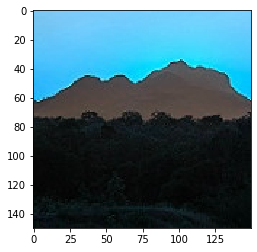

In [13]:
plot.imshow(Images[0])

In [14]:
get_classlabel(Labels[0])

'mountain'

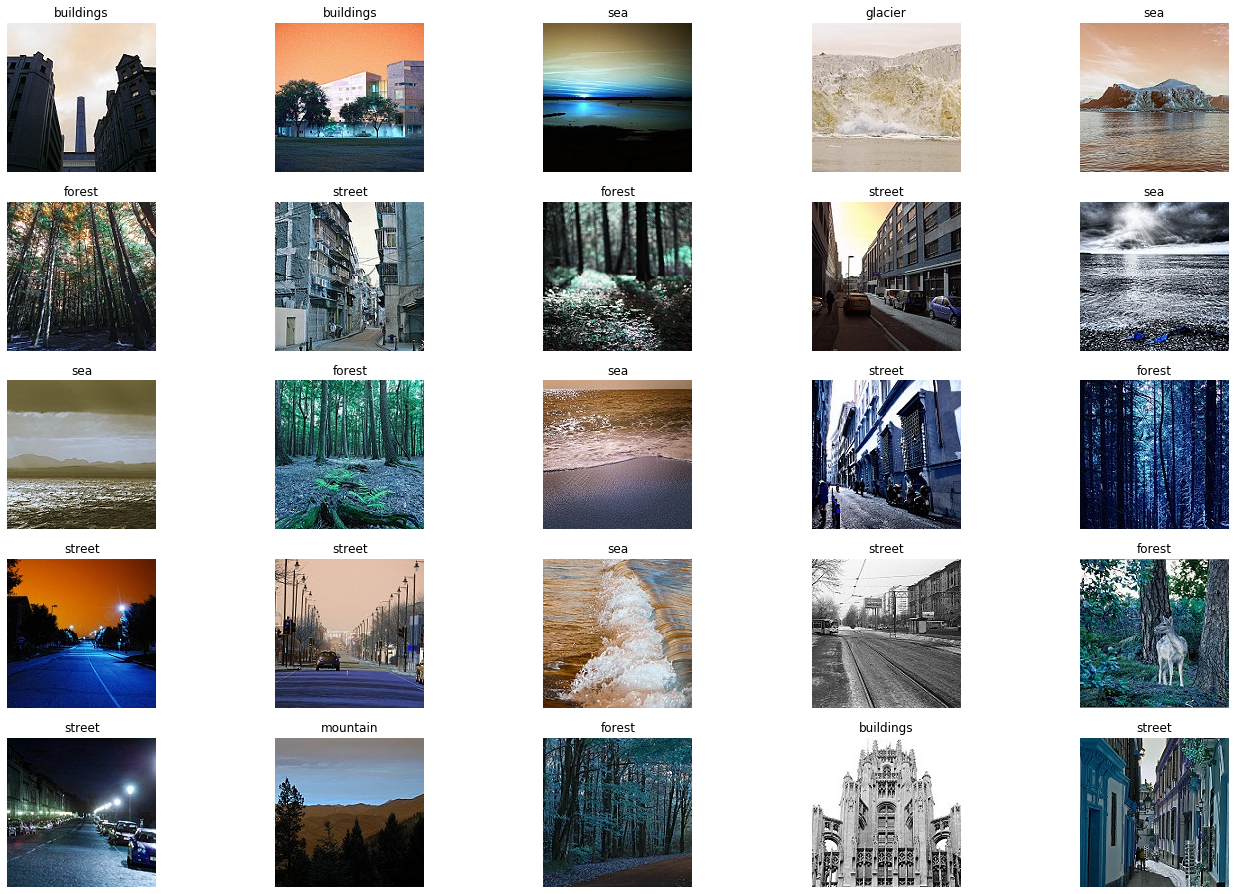

In [15]:
f,ax = plot.subplots(5,5) # 여러개의 이미지 표시 위해 subplot 사용. 가로 5개, 세로 5개의 이미지 표시
f.subplots_adjust(0,0,3,3) # subplot들의 위치 조정
for i in range(0,5,1): # 세로로 표시할 이미지 개수
    for j in range(0,5,1): # 가로로 표시할 이미지 개수
        rnd_number = randint(0,len(Images)) # 출력하고자 하는 이미지 랜덤으로 선택하기 위해 이미지 개수 내의 숫자에서 random number 생성
        ax[i,j].imshow(Images[rnd_number]) # imshow() : 벡터로 이루어진 이미지 array를 넣으면 이미지로 보여준다.
        ax[i,j].set_title(get_classlabel(Labels[rnd_number])) # get_classlable() : 결과값을 정수로 넣으면 정수에 맞는 레이블을 글자로 출력해주는 함수
        ax[i,j].axis('off') # x, y 축 표시하지 않는다

기본적인 CNN 모델 빌드하기

## model1(act = elu, he_normal)

In [16]:
# 기본 cnn 모델
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation=tf.nn.elu,input_shape=(150,150,3), kernel_initializer=initializers.he_normal(seed=2020)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation=tf.nn.elu))
model.add(Layers.Dense(100,activation=tf.nn.elu))
model.add(Layers.Dense(50,activation=tf.nn.elu))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg')) 오류나는데 어쩌지
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________

모델 훈련 시키기. validation split은 30% - validation split은 오버피팅을 방지하기 위해

In [17]:
%%time
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 55s 6ms/sample - loss: 3.3411 - acc: 0.3272 - val_loss: 1.2351 - val_acc: 0.5099
Epoch 2/35
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.3112 - acc: 0.4953 - val_loss: 0.9499 - val_acc: 0.6360
Epoch 3/35
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.1082 - acc: 0.5884 - val_loss: 0.8254 - val_acc: 0.6863
Epoch 4/35
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.9658 - acc: 0.6506 - val_loss: 0.7141 - val_acc: 0.7447
Epoch 5/35
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.9131 - acc: 0.6698 - val_loss: 0.7001 - val_acc: 0.7393
Epoch 6/35
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.8365 - acc: 0.7032 - val_loss: 0.7642 - val_acc: 0.7224
Epoch 7/35
9823/9823 [==============================] - 47s 5ms/sample - loss: 0.7751 - acc: 0.7210 - val_loss: 0.7038 - val_acc: 

### model1 graph

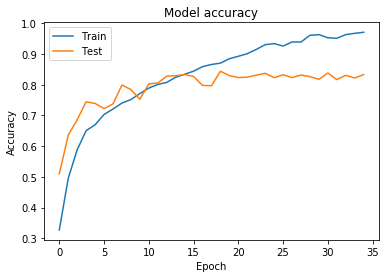

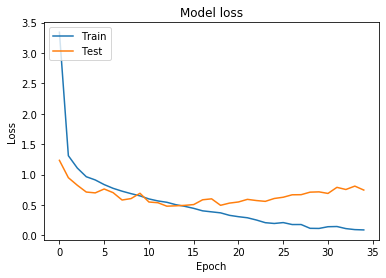

In [18]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

## model2(act = elu, he_normal, dropout)

In [22]:
# 기본 cnn 모델
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation=tf.nn.elu,input_shape=(150,150,3), kernel_initializer=initializers.he_normal(seed=2020)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation=tf.nn.elu))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation=tf.nn.elu))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(100,activation=tf.nn.elu))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(50,activation=tf.nn.elu))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg')) 오류나는데 어쩌지
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 50)       

In [23]:
%%time
trained = model.fit(Images,Labels,epochs=100,validation_split=0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 4.8347 - acc: 0.1962 - val_loss: 1.4334 - val_acc: 0.4092
Epoch 2/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.9818 - acc: 0.2687 - val_loss: 1.3676 - val_acc: 0.4294
Epoch 3/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.7303 - acc: 0.3148 - val_loss: 1.2247 - val_acc: 0.5065
Epoch 4/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.5508 - acc: 0.3823 - val_loss: 1.0992 - val_acc: 0.5604
Epoch 5/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.4463 - acc: 0.4244 - val_loss: 1.1471 - val_acc: 0.5144
Epoch 6/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.3400 - acc: 0.4640 - val_loss: 0.9368 - val_acc: 0.5899
Epoch 7/100
9823/9823 [==============================] - 47s 5ms/sample - loss: 1.2705 - acc: 0.4866 - val_loss: 0.8762 - va

### model2 graph

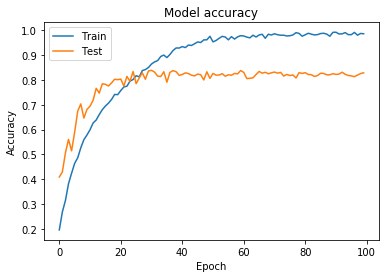

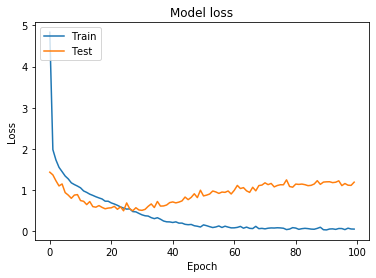

In [24]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

모델 평가

In [27]:
test_images,test_labels = get_images('/content/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1) # Returns the loss value & metrics values for the model in test mode.

3000/3000 [==============================] - 4s 1ms/sample - loss: 1.2368 - acc: 0.8137


[1.236770608107249, 0.81366664]

> Lets predict the images from the "pred" folder.

In [0]:
pred_images,no_labels = get_images('/content/seg_pred/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

In [0]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

# image augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [0]:
# datagen = ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True)

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(n_Images, Labels, test_size=0.3, random_state=2020, shuffle=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9823, 150, 150, 3), (4211, 150, 150, 3), (9823,), (4211,))

In [0]:
datagen.fit(x_train, seed=2020)

In [0]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=35)